The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [77]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Gathering

In [78]:
nobel = pd.read_csv('/Users/dani/Data Science/Projects/DataCamp Projects/Visualizing the History of Nobel Prize Winners/datasets/nobel.csv')

# Data Transformation
*leaving nulls as is, given the brief*

In [79]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [80]:
nobel.describe()

,year,laureate_id
count,1000.000000,1000.000000
mean,1973.721000,509.099000
std,34.523195,298.130617
min,1901.000000,1.000000
25%,1949.750000,250.750000
50%,1979.000000,500.500000
75%,2003.000000,764.250000
max,2023.000000,1034.000000


In [81]:
display(nobel)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-00-00,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America,NaN,NaN,NaN
996,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1031,Individual,Aleksey Yekimov,1945-00-00,NaN,USSR (now Russia),Male,Nanocrystals Technology Inc.,"New York, NY",United States of America,NaN,NaN,NaN
997,2023,Literature,The Nobel Prize in Literature 2023,"""for his innovative plays and prose which give...",1/1,1032,Individual,Jon Fosse,1959-09-29,Haugesund,Norway,Male,NaN,NaN,NaN,NaN,NaN,NaN
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN,NaN,NaN,NaN


# Data Transformation
*removing columns not part of this analysis*

In [82]:
df = nobel.drop(['prize','motivation', 'death_date', 'death_city', 'death_country'], axis=1)

# Data Exploration

'Male'

'United States of America'

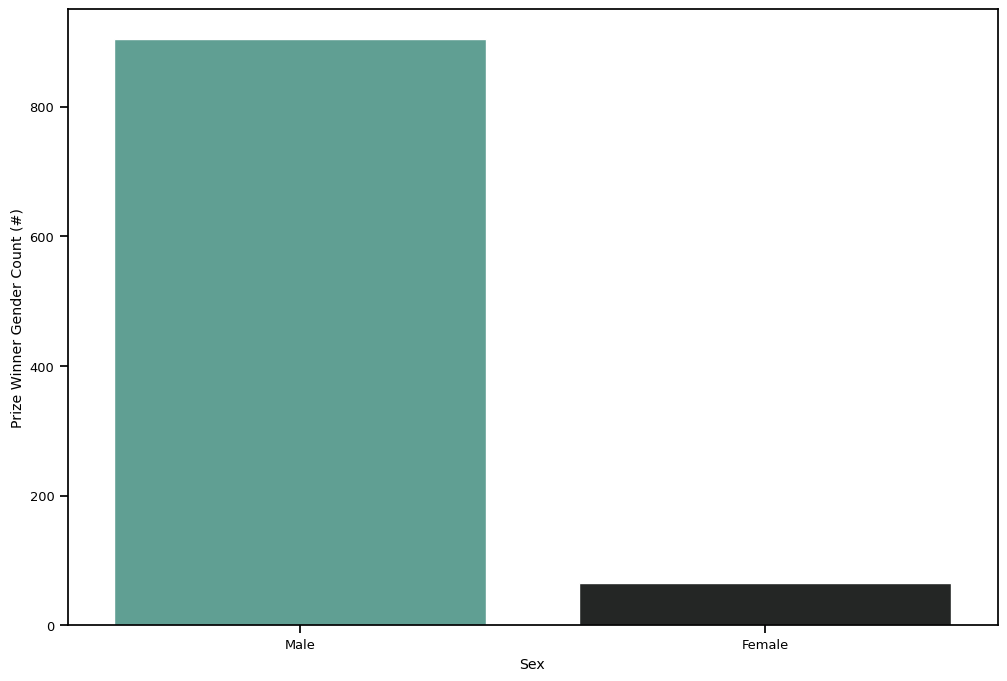

In [83]:
# most commonly awarded gender and birth country
top_gender = nobel['sex'].value_counts().index[0]
top_country = nobel['birth_country'].value_counts().index[0]
display(top_gender, top_country)

fig, ax = plt.subplots(figsize=(12, 8))
g = sns.countplot(data=nobel,
                  x='sex',
                  hue='sex',
                  color= '#d0bbff',
                  palette="dark:#5A9_r",
                  ax=ax,
                  dodge=False,
                  edgecolor = "white",
                  legend=False
                  )

ax.set(xlabel="Sex", ylabel='Prize Winner Gender Count (#)')
plt.show()

,decade,us_born_winner
10,2000,123
11,2010,121
7,1970,104
9,1990,104
8,1980,97
6,1960,79
5,1950,72
0,1900,57
3,1930,56
2,1920,54


2000

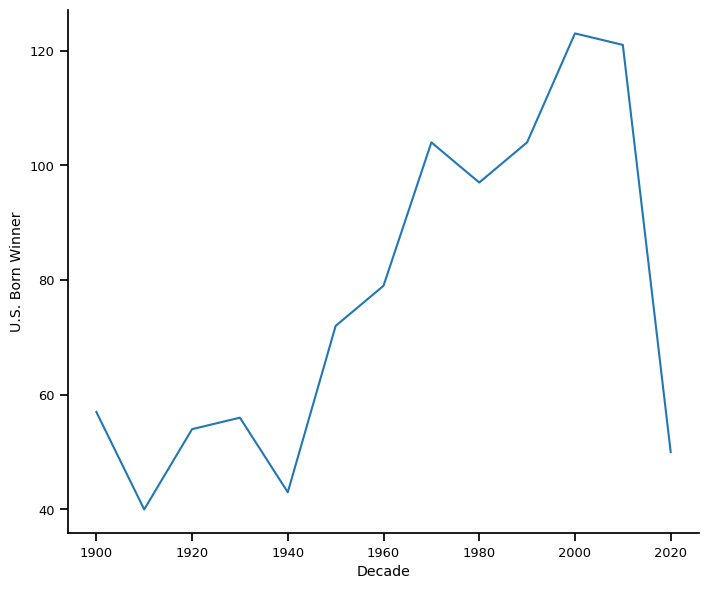

In [84]:
# decade with the highest proportion of US-born winners
nobel['us_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int) # decade conversion
prop_usa_winners = nobel.groupby('decade', as_index=False)['us_born_winner'].count().sort_values(by='us_born_winner',ascending=False)
display(prop_usa_winners)

max_decade_usa = prop_usa_winners[prop_usa_winners['us_born_winner'] == prop_usa_winners['us_born_winner'].max()]['decade'].values[0]
display(max_decade_usa)

sns.set_context("notebook", font_scale=.85)
g = sns.relplot(x='decade', y='us_born_winner', data=prop_usa_winners, kind="line", height=6, aspect=1.2)
g.set_axis_labels('Decade', 'U.S. Born Winner')
g.tight_layout()
plt.show()

,decade,category,female_winner
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923
...,...,...,...
67,2020,Economics,0.111111
68,2020,Literature,0.500000
69,2020,Medicine,0.125000
70,2020,Peace,0.285714


,decade,category
68,2020,Literature


{2020: 'Literature'}

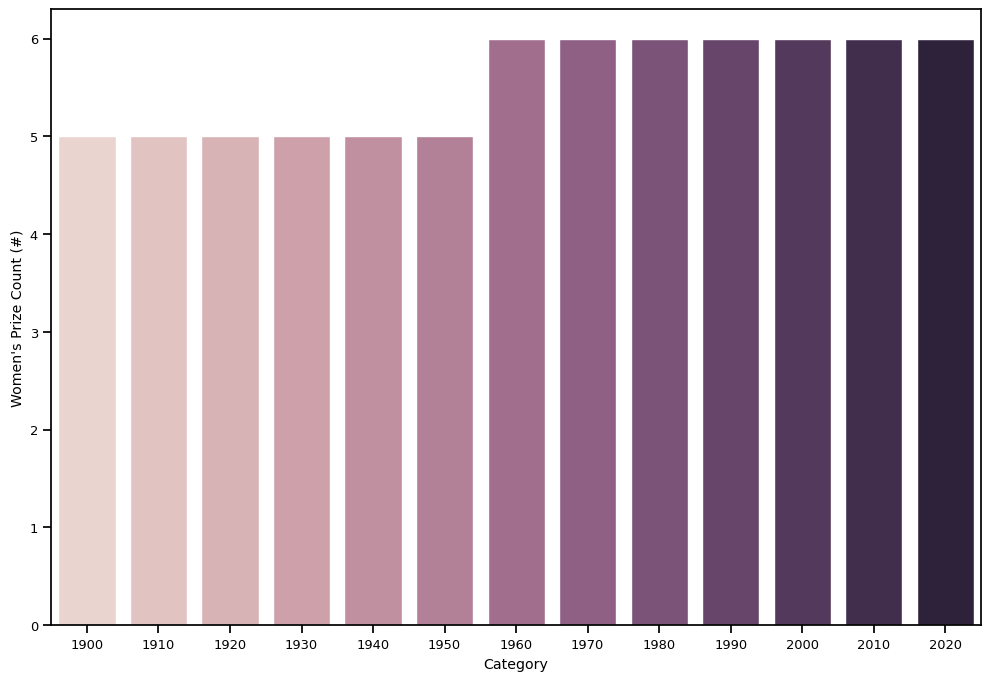

In [85]:
# decade and category pair for highest proportion of female laureates
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
display(prop_female_winners)

max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]

display(max_female_decade_category)

max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}

display(max_female_dict)

fig, ax = plt.subplots(figsize=(12, 8))
g = sns.countplot(data=prop_female_winners,
                  x='decade',
                  hue='decade',
                  #color= '#d0bbff',
                  #palette="mako",
                  ax=ax,
                  dodge=False,
                  edgecolor = "white",
                  legend=False,
                  )

ax.set(xlabel="Category", ylabel="Women's Prize Count (#)")
plt.show()

,year,category,full_name,sex,size
969,2023,Physics,Pierre Agostini,Male,1
964,2023,Medicine,Drew Weissman,Male,1
959,2023,Chemistry,Aleksey Yekimov,Male,1
960,2023,Chemistry,Louis Brus,Male,1
961,2023,Chemistry,Moungi Bawendi,Male,1
...,...,...,...,...,...
2,1901,Medicine,Emil Adolf von Behring,Male,1
1,1901,Literature,Sully Prudhomme,Male,1
4,1901,Peace,Jean Henry Dunant,Male,1
5,1901,Physics,Wilhelm Conrad Röntgen,Male,1


,year,category,full_name,sex,size
18,1903,Physics,"Marie Curie, née Sklodowska",Female,1


'Marie Curie, née Sklodowska'

'Physics'

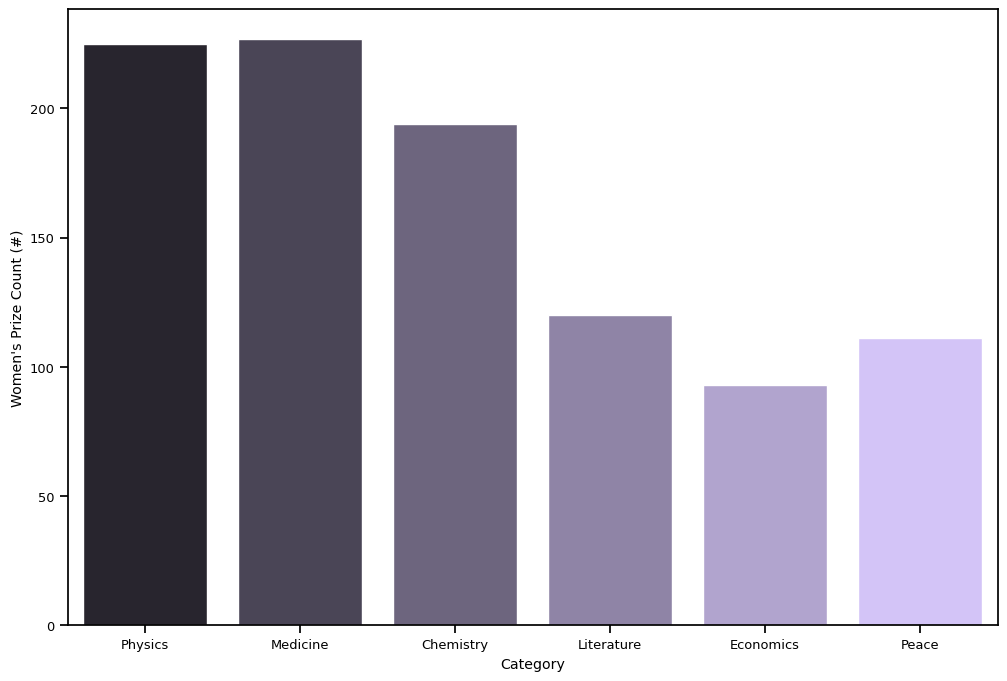

In [86]:
# first woman to receive nobel prize and the category
grouped_df = nobel.groupby(['year', 'category', 'full_name', 'sex'], as_index=False).size().sort_values(by='year', ascending=False)
display(grouped_df)

df_fem = pd.DataFrame(grouped_df).query('sex == "Female"').sort_values(by= 'year', ascending=True).head(1)
display(df_fem)

first_woman_name = df_fem['full_name'].values[0]
first_woman_category = df_fem['category'].values[0]
display(first_woman_name)
display(first_woman_category)

fig, ax = plt.subplots(figsize=(12, 8))
g = sns.countplot(data=grouped_df,
                  x='category',
                  hue='category',
                  palette='dark:#d0bbff',
                  ax=ax,
                  dodge=False,
                  edgecolor = "white",
                  legend=False,
                  )

ax.set(xlabel="Category", ylabel="Women's Prize Count (#)")
plt.show()


In [87]:
# multiple noble prizes throughout the years
counts = nobel['full_name'].value_counts()
display(counts)

repeats = counts[counts >= 2].index
display(repeats)

repeat_list = list(repeats)
display(repeat_list)

full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Frederick Sanger                                                                     2
Marie Curie, née Sklodowska                                                          2
                                                                                    ..
Karl Ziegler                                                                         1
Giulio Natta                                                                         1
Giorgos Seferis                                                                      1
Sir John Carew Eccles                                                                1
Claudia Goldin                                                                       1
Name: count, Length: 993, dtype: 

Index(['Comité international de la Croix Rouge (International Committee of the Red Cross)',
       'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger',
       'Marie Curie, née Sklodowska',
       'Office of the United Nations High Commissioner for Refugees (UNHCR)'],
      dtype='object', name='full_name')

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']

# Results

What is the most commonly awarded gender and birth country? Storing the string answers as top_gender and top_country.

- **Awards are most commonly awarded to Males from the United States of America.**

What decade had the highest proportion of US-born winners? Store this as an integer called max_decade_usa. 

- **2000 had the largest proportion of US-born winners.**

What decade and category pair had the highest proportion of female laureates? Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. 

- **2010 had 13 female laureates.**

Who was the first woman to receive a Nobel Prize, and in what category? Save your string answers as first_woman_name and first_woman_category. 

- **Marie Curie in 1903 thorugh her work in Physics.**

Which individuals or organizations have won multiple Nobel Prizes throughout the years? Store the full names in a list named repeat_list.

**['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']**